## Compare features for each category

Set dynamic feature

In [ ]:
# set dynamic feature
feature = 'feature_energy'


------
Start processing:

In [32]:
# required packages
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import math

Import and prepare the dataset:

In [33]:
# result.json contains flattened json (so list of dicts)
f = open(os.path.join(os.getcwd(), "..", "data_collection", "json", "flat_json_hiphop_rock_jazz.json"))
json_data = json.load(f)

# Convert list of dicts to dataframe
df = pd.DataFrame(json_data) 
df

,category.id,category.name,category.playlist.id,category.playlist.name,category.playlist.track.id,category.playlist.track.name,category.playlist.track.album.id,category.playlist.track.album.name,category.playlist.track.artist,category.playlist.track.feature.danceability,...,category.playlist.track.feature.loudness,category.playlist.track.feature.mode,category.playlist.track.feature.speechiness,category.playlist.track.feature.acousticness,category.playlist.track.feature.instrumentalness,category.playlist.track.feature.liveness,category.playlist.track.feature.valence,category.playlist.track.feature.tempo,category.playlist.track.feature.duration_ms,category.playlist.track.feature.time_signature
0,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,2BcMwX1MPV6ZHP4tUT9uq6,Knife Talk (with 21 Savage ft. Project Pat),3SpBlxme9WbeQdI9kx7KAV,Certified Lover Boy,"Drake, 21 Savage, Project Pat",0.849,...,-9.579,0,0.324,0.0635,0,0.0834,0.153,145.887,242966,4
1,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,3J4VKkUpLvomXJbn9ZAypO,Sharing Locations (feat. Lil Baby & Lil Durk),0q6qOUfC4ikWtv62KCnoip,Sharing Locations (feat. Lil Baby & Lil Durk),"Meek Mill, Lil Durk, Lil Baby",0.681,...,-5.585,1,0.0385,0.00383,0,0.139,0.183,151.951,161053,4
2,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,7Bpx2vsWfQFBACRz4h3IqH,family ties (with Kendrick Lamar),3HqmX8hGcbbQZODgayNEYx,family ties (with Kendrick Lamar),"Baby Keem, Kendrick Lamar",0.711,...,-5.453,1,0.329,0.00575,0,0.231,0.144,134.14,252070,4
3,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,52nTQQahs46s1iHFQ3Wv5Q,Pissed Me Off,70m1QwzUoogjk2DDq1hA3b,Pissed Me Off,Lil Durk,0.723,...,-10.707,0,0.485,0.00311,1.26e-06,0.115,0.223,155.967,123077,4
4,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,4KDNRh9Oor80z3XIxdWlui,Bubbly (with Drake & Travis Scott),7IKkHmEk4It4cRdOYanyvW,Punk,"Young Thug, Drake, Travis Scott",0.91,...,-7.572,0,0.257,0.0536,0,0.127,0.599,129.011,165067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,jazz,Jazz,37i9dQZF1DWYd2pXOke6Ag,Becoming presents: Kamasi Washington,34xTFwjPQ1dC6uJmleno7x,Godspeed,3mH6qwIy9crq0I9YQbOuDf,Blonde,Frank Ocean,0.421,...,-12.561,1,0.0479,0.931,0.000201,0.126,0.0773,109.698,177922,4
18724,jazz,Jazz,37i9dQZF1DWYd2pXOke6Ag,Becoming presents: Kamasi Washington,6FIpyQeZ4caGR6V29kyYfy,I Am Becoming,2ndDhPpR5sSsbtlJtsXCqi,Becoming (Music from the Netflix Original Docu...,Kamasi Washington,0.503,...,-12.02,1,0.0295,0.0412,0.922,0.0965,0.489,166.105,263447,4
18725,jazz,Jazz,37i9dQZF1DWYd2pXOke6Ag,Becoming presents: Kamasi Washington,6jXAdaU4wshOAHXCUVvkn3,Cherokee,2j2q2ySuVk43eHB8wI5XQj,The Epic,Kamasi Washington,0.644,...,-9.965,1,0.117,0.751,0.224,0.107,0.632,90.564,494467,4
18726,jazz,Jazz,37i9dQZF1DWYd2pXOke6Ag,Becoming presents: Kamasi Washington,2O9ufTJxuL5t3GVYQX6lSp,Southside V.1,2ndDhPpR5sSsbtlJtsXCqi,Becoming (Music from the Netflix Original Docu...,Kamasi Washington,0.462,...,-13.396,1,0.0586,0.665,0.946,0.114,0.426,179.658,77190,3


In [34]:
# Drop unneeded columns
columns_to_drop = [
    "category.name",
    "category.playlist.id",
    "category.playlist.name",
    "category.playlist.track.id",
    "category.playlist.track.name",
    "category.playlist.track.album.id",
    "category.playlist.track.album.name",
    "category.playlist.track.artist"
    ]
df = df.drop(columns=columns_to_drop)

df = df.rename(columns={
    "category.id": "category",
    "category.playlist.track.feature.danceability": "feature_danceability",
    "category.playlist.track.feature.energy": "feature_energy",
    "category.playlist.track.feature.key": "feature_key",
    "category.playlist.track.feature.loudness": "feature_loudness",
    "category.playlist.track.feature.mode": "feature_mode",
    "category.playlist.track.feature.speechiness": "feature_speechiness",
    "category.playlist.track.feature.acousticness": "feature_acousticness",
    "category.playlist.track.feature.instrumentalness": "feature_instrumentalness",
    "category.playlist.track.feature.liveness": "feature_liveness",
    "category.playlist.track.feature.valence": "feature_valence",
    "category.playlist.track.feature.tempo": "feature_tempo",
    "category.playlist.track.feature.duration_ms": "feature_duration_ms",
    "category.playlist.track.feature.time_signature": "feature_time_signature"
})
df

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.849,0.424,5,-9.579,0,0.324,0.0635,0,0.0834,0.153,145.887,242966,4
1,hiphop,0.681,0.63,1,-5.585,1,0.0385,0.00383,0,0.139,0.183,151.951,161053,4
2,hiphop,0.711,0.611,1,-5.453,1,0.329,0.00575,0,0.231,0.144,134.14,252070,4
3,hiphop,0.723,0.516,11,-10.707,0,0.485,0.00311,1.26e-06,0.115,0.223,155.967,123077,4
4,hiphop,0.91,0.585,11,-7.572,0,0.257,0.0536,0,0.127,0.599,129.011,165067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,jazz,0.421,0.0952,6,-12.561,1,0.0479,0.931,0.000201,0.126,0.0773,109.698,177922,4
18724,jazz,0.503,0.491,0,-12.02,1,0.0295,0.0412,0.922,0.0965,0.489,166.105,263447,4
18725,jazz,0.644,0.594,5,-9.965,1,0.117,0.751,0.224,0.107,0.632,90.564,494467,4
18726,jazz,0.462,0.211,0,-13.396,1,0.0586,0.665,0.946,0.114,0.426,179.658,77190,3


In [35]:
# create sub-dataframes for each feature
df_hiphop = df.loc[df['category'] == 'hiphop']
df_jazz   = df.loc[df['category'] == 'jazz']
df_rock   = df.loc[df['category'] == 'rock']

Create dataframe for plotting in matplotlib

In [36]:
# reset index for each dataframe
df_hiphop.reset_index(drop=True, inplace=True)
df_jazz.reset_index(drop=True, inplace=True)
df_rock.reset_index(drop=True, inplace=True)

# create a dataframe for feature
dict_feature =   {  'hiphop': df_hiphop[feature].astype(float),
                        'jazz': df_jazz[feature].astype(float),
                        'rock': df_rock[feature].astype(float)
            }

df_feature   = pd.DataFrame(dict_feature)

df_feature

,hiphop,jazz,rock
0,0.424,0.338,0.930
1,0.630,0.724,0.746
2,0.611,0.600,0.608
3,0.516,0.457,0.853
4,0.585,0.624,0.941
...,...,...,...
10444,NaN,NaN,0.722
10445,NaN,NaN,0.396
10446,NaN,NaN,0.638
10447,NaN,NaN,0.720


In [37]:
# dynamic bins (categories in which data should be splitted)
# current setup -> ten categories: min, <10%, <20%, <30%, ... , <90%, <max

# total highest value 
max_hiphop = math.ceil(df_feature['hiphop'].nlargest(1))
max_jazz   = math.ceil(df_feature['jazz'].nlargest(1).round())
max_rock   = math.ceil(df_feature['rock'].nlargest(1).round())

# total lowest value
min_hiphop = math.floor(df_feature['hiphop'].nsmallest(1))
min_jazz   = math.floor(df_feature['jazz'].nsmallest(1))
min_rock   = math.floor(df_feature['rock'].nsmallest(1))

# highest max
max = max_hiphop
if max_jazz > max:
    max = max_jazz
if max_rock > max:
    max = max_rock

# smallest max
min = min_hiphop
if min_jazz < min:
    min = min_jazz
if min_rock < min:
    min = min_rock


print("Max: ", max)
print("Min: ", min)

# build bin array
bin_values = [min, (min + ((max - min)*0.1)), (min + ((max - min)*0.2)), (min + ((max - min)*0.3)), (min + ((max - min)*0.4)), (min + ((max - min)*0.5)),
              (min + ((max - min)*0.6)), (min + ((max - min)*0.7)), (min + ((max - min)*0.8)), (min + ((max - min)*0.9)), max]

bin_values

Max:  1
Min:  0


[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [38]:
# add ranges for feature
df_feature['hiphop_range']  = pd.cut(df_feature['hiphop'], bins = bin_values)
df_feature['jazz_range']    = pd.cut(df_feature['jazz'], bins = bin_values)
df_feature['rock_range']    = pd.cut(df_feature['rock'], bins = bin_values)

df_feature

,hiphop,jazz,rock,hiphop_range,jazz_range,rock_range
0,0.424,0.338,0.930,"(0.4, 0.5]","(0.3, 0.4]","(0.9, 1.0]"
1,0.630,0.724,0.746,"(0.6, 0.7]","(0.7, 0.8]","(0.7, 0.8]"
2,0.611,0.600,0.608,"(0.6, 0.7]","(0.5, 0.6]","(0.6, 0.7]"
3,0.516,0.457,0.853,"(0.5, 0.6]","(0.4, 0.5]","(0.8, 0.9]"
4,0.585,0.624,0.941,"(0.5, 0.6]","(0.6, 0.7]","(0.9, 1.0]"
...,...,...,...,...,...,...
10444,NaN,NaN,0.722,NaN,NaN,"(0.7, 0.8]"
10445,NaN,NaN,0.396,NaN,NaN,"(0.3, 0.4]"
10446,NaN,NaN,0.638,NaN,NaN,"(0.6, 0.7]"
10447,NaN,NaN,0.720,NaN,NaN,"(0.7, 0.8]"


In [39]:
# write into new dataframe -> count for each category 
df_plot_feature = pd.DataFrame()
df_plot_feature['hiphop'] = pd.DataFrame(df_feature['hiphop_range'].value_counts())
df_plot_feature['jazz']   = pd.DataFrame(df_feature['jazz_range'].value_counts())
df_plot_feature['rock']   = pd.DataFrame(df_feature['rock_range'].value_counts())

df_plot_feature

,hiphop,jazz,rock
"(0.6, 0.7]",870,498,1417
"(0.5, 0.6]",776,555,901
"(0.7, 0.8]",627,364,1825
"(0.4, 0.5]",458,623,568
"(0.8, 0.9]",324,242,2603
"(0.3, 0.4]",149,659,308
"(0.9, 1.0]",83,97,2631
"(0.2, 0.3]",16,598,136
"(0.1, 0.2]",8,704,49
"(0.0, 0.1]",2,626,11


In [40]:
# sort dataframe by index
df_plot_feature = df_plot_feature.sort_index()

# nomalize data (categories in precentages of total)
df_plot_feature = df_plot_feature.div(df_plot_feature.sum(axis=0), axis=1)

df_plot_feature

,hiphop,jazz,rock
"(0.0, 0.1]",0.000604,0.126057,0.001053
"(0.1, 0.2]",0.002415,0.141764,0.004689
"(0.2, 0.3]",0.004829,0.120419,0.013016
"(0.3, 0.4]",0.044974,0.132702,0.029477
"(0.4, 0.5]",0.138243,0.125453,0.054359
"(0.5, 0.6]",0.234229,0.111760,0.086228
"(0.6, 0.7]",0.262602,0.100282,0.135611
"(0.7, 0.8]",0.189254,0.073298,0.174658
"(0.8, 0.9]",0.097797,0.048731,0.249115
"(0.9, 1.0]",0.025053,0.019533,0.251794


Plot feature for each column (currently easiest form possible)

Text(0.5, 1.0, 'Feature: feature_energy')

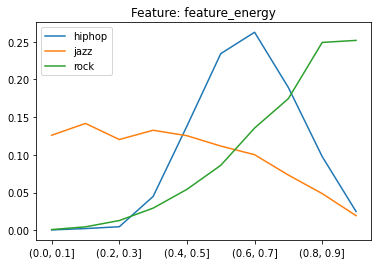

In [41]:
df_plot_feature.plot()
plt.title("Feature: " + feature)